In [286]:
import numpy as np
import pandas as pd
from scipy import stats

songs=pd.read_csv('data/tracks.csv')
songs=songs.sample(n=25000)

# Obtaining louris songs

In [287]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import re 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf 
from plotnine import *

In [288]:
client_id = "7b172c47988b4d2da267ad35a2a23d88"
client_secret = "bd980144781a436ca841e0d54187cd74"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 

In [289]:
# with open('data/spotify_ids.txt', 'r') as f:
#     all_track_ids = [line.strip() for line in f]

In [290]:
# tracks = tracks_to_test.reset_index().rename(columns={'index' : 'song_id'})

# ksekinaw

In [291]:
songs_for_neural = songs.copy()
songs_for_neural.set_index('id',inplace=True)

In [292]:
def drop_columns(dataframe,to_be_deleted):
    dataframe.drop(to_be_deleted, axis=1, inplace=True)
to_be_deleted = ['id_artists', 'artists','name','release_date'] 

In [293]:
songs_for_neural['year'] = pd.DatetimeIndex(songs_for_neural['release_date']).year
songs_for_neural['month'] = pd.DatetimeIndex(songs_for_neural['release_date']).month

In [294]:
drop_columns(songs_for_neural,to_be_deleted)#delete columns

In [295]:
from sklearn import preprocessing

def scale_whole_df_except_valence():
    valence_only = songs_for_neural['valence']
    del songs_for_neural["valence"]

    x = songs_for_neural #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    songs_for_neural[songs_for_neural.columns] = min_max_scaler.fit_transform(songs_for_neural[songs_for_neural.columns].to_numpy())
    songs_for_neural['valence'] = valence_only
# scale_whole_df_except_valence()

In [296]:
songs_for_neural["key"] = songs_for_neural["key"].astype("category")
songs_for_neural = pd.get_dummies(songs_for_neural, columns=["key"])

In [297]:
songs_for_neural.dropna(inplace=True)

In [298]:
x = songs_for_neural['valence']
del songs_for_neural["valence"]
songs_for_neural['valence'] = x 

# AND SO IT BEGINS

In [299]:
songs_for_neural

,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,valence
id,,,,,,,,,,,,,,,,,,,,,
4Fbc2m4RjOrr6DNmil9byE,8,307107,0,0.583,0.542,-12.644,0,0.0339,0.6010,0.001500,...,0,0,1,0,0,0,0,0,0,0.913
733ceORqYo0LjPaqkXzmGc,36,242000,0,0.639,0.764,-8.158,1,0.0326,0.0462,0.002150,...,0,0,0,0,0,0,1,0,0,0.857
3crQSTvz94iEd2BbKg1kLx,20,32095,0,0.774,0.379,-14.964,1,0.5520,0.8010,0.000000,...,0,0,0,0,0,0,0,0,0,0.609
7KTZXoyFcP6EUccLPnmn7j,15,149238,0,0.735,0.906,-12.144,0,0.0572,0.4330,0.000000,...,0,0,0,0,0,0,1,0,0,0.938
1h8sss0Ckkashw62PRs4UF,29,213211,0,0.410,0.238,-13.903,0,0.0436,0.6080,0.000003,...,0,0,0,1,0,0,0,0,0,0.293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6OLqAJGyNLeksAQnEQCIz2,14,271133,0,0.767,0.745,-7.822,1,0.0539,0.1050,0.000000,...,0,1,0,0,0,0,0,0,0,0.914
28CDZ57gYDikYi2KZ7cznW,47,352773,0,0.561,0.351,-16.977,0,0.0364,0.5350,0.000001,...,0,0,0,0,0,0,0,0,0,0.387
6vOJHoP0bNnqwm92aEFpNm,13,134933,0,0.510,0.308,-13.515,1,0.0255,0.4310,0.001010,...,0,0,0,0,0,0,0,0,1,0.440


In [300]:
songs_for_neural_array = songs_for_neural.values

In [301]:
length_of_df_without_valence = len(songs_for_neural_array[0])-1

In [302]:
X = songs_for_neural_array[:,0:length_of_df_without_valence]

In [303]:
Y = songs_for_neural_array[:,length_of_df_without_valence]

In [304]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [305]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(17500, 27) (3750, 27) (3750, 27) (17500,) (3750,) (3750,)


In [306]:
from tensorflow.keras.layers.experimental import preprocessing
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))

In [307]:
from keras.models import Sequential
from keras.layers import Dense

In [308]:
from keras.layers import Dropout
from keras import regularizers
from tensorflow import keras

In [309]:
model = Sequential([
    normalizer,
    Dense(64, activation='relu', input_shape=(27,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1),
])

In [310]:
model.compile(optimizer='adam',
              loss='mean_absolute_error')

In [311]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val),
          callbacks=[early_stop])

Epoch 1/100
547/547 [==============================] - 1s 2ms/step - loss: 0.2526 - val_loss: 0.1776
Epoch 2/100
547/547 [==============================] - 1s 1ms/step - loss: 0.1757 - val_loss: 0.1596
Epoch 3/100
547/547 [==============================] - 1s 1ms/step - loss: 0.1622 - val_loss: 0.1520
Epoch 4/100
547/547 [==============================] - 1s 1ms/step - loss: 0.1566 - val_loss: 0.1521
Epoch 5/100
547/547 [==============================] - 1s 1ms/step - loss: 0.1538 - val_loss: 0.1498
Epoch 6/100
547/547 [==============================] - 1s 1ms/step - loss: 0.1505 - val_loss: 0.1453
Epoch 7/100
547/547 [==============================] - 1s 1ms/step - loss: 0.1491 - val_loss: 0.1426
Epoch 8/100
547/547 [==============================] - 1s 1ms/step - loss: 0.1475 - val_loss: 0.1465
Epoch 9/100
547/547 [==============================] - 1s 1ms/step - loss: 0.1470 - val_loss: 0.1421
Epoch 10/100
547/547 [==============================] - 1s 1ms/step - loss: 0.1455 - val_lo

In [312]:
model.evaluate(X_test, Y_test,verbose=0)

0.13870762288570404

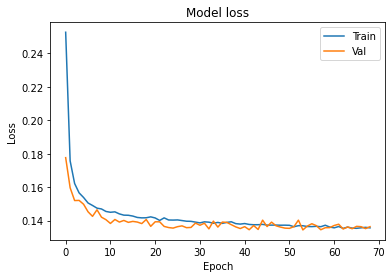

In [313]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

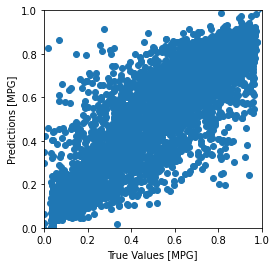

In [85]:
test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(Y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# Neural second approach

In [125]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [133]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=10, min_lr=0.01)

In [183]:
from keras.callbacks import ModelCheckpoint

checkpoint_name = 'Weights\Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 

checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]


In [ ]:
    # layers.BatchNormalization(),
    # model.add(layers.Dense(64, input_shape=(27,))),
    # model.add(layers.LeakyReLU(alpha=0.3)),
    # layers.Dropout(rate=0.3),
    # layers.BatchNormalization(),
    # model.add(layers.Dense(64)),
    # model.add(layers.LeakyReLU(alpha=0.3)),
    # model.add(layers.Dropout(rate=0.15)),
    
    # layers.Dense(1, activation='sigmoid'),

In [189]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=15, # how many epochs to wait before stopping
    restore_best_weights=True,
)


dl_model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu', input_shape=(27,)),
    layers.Dropout(rate=0.15),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

dl_model.compile(
    optimizer="adam",
    loss="mae",
)

history = dl_model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    batch_size=32,
    epochs=100,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
)



Epoch 1/100
547/547 [==============================] - 1s 2ms/step - loss: 0.1496 - val_loss: 0.1265
Epoch 2/100
547/547 [==============================] - 1s 2ms/step - loss: 0.1312 - val_loss: 0.1252
Epoch 3/100
547/547 [==============================] - 1s 2ms/step - loss: 0.1270 - val_loss: 0.1223
Epoch 4/100
547/547 [==============================] - 1s 2ms/step - loss: 0.1253 - val_loss: 0.1207
Epoch 5/100
547/547 [==============================] - 1s 2ms/step - loss: 0.1242 - val_loss: 0.1191
Epoch 6/100
547/547 [==============================] - 1s 2ms/step - loss: 0.1229 - val_loss: 0.1187
Epoch 7/100
547/547 [==============================] - 1s 2ms/step - loss: 0.1220 - val_loss: 0.1181
Epoch 8/100
547/547 [==============================] - 1s 2ms/step - loss: 0.1206 - val_loss: 0.1181
Epoch 9/100
547/547 [==============================] - 1s 1ms/step - loss: 0.1214 - val_loss: 0.1174
Epoch 10/100
547/547 [==============================] - 1s 1ms/step - loss: 0.1206 - val_lo

Minimum validation loss: 0.11400499939918518


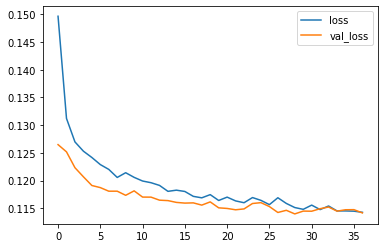

In [190]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [191]:
model.evaluate(X_test, Y_test, verbose=0)

0.11353887617588043